# Smooth data on a $b \times b$ grid then compute the Cumutal Mutual Information based on the difference between joint and marginal cumulative entropies


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

# Original Data

In [14]:
sizeOfVector = 10
#x = np.random.rand(sizeOfVector) #For a given vector x with random value numbers and
#y =x #+ 0.1*np.random.rand(sizeOfVector) #a given vector y with random value numbers

x = np.array([ 0.6358171 ,  0.99577192 , 0.64413589 , 0.68141891 , 0.64693171 , 0.27456281 , 0.08515774 , 0.24606362 , 0.79079224 , 0.12927175])
y = np.array([ 0.41911051 , 0.05476291 , 0.7635048 ,  0.05124239 , 0.7299192  , 0.1485072 , 0.92069862 , 0.85522989 , 0.88012141 , 0.6219437])

#print(x)
#print(y)
#plt.scatter(x,y)

# Resizing Data

In [15]:
b =5 #SIZE OF GRID
#Distribution formula in 1 dimension
x_r = ((x-min(x))/(max(x)-min(x)))*b #Let x' be the vector x rescaled on the interval [0,b]
y_r = ((y-min(y))/(max(y)-min(y)))*b #Let y' be the vector y rescaled on the interval [0,b]


x=x-np.mean(x)
y=y-np.mean(y)

#x_r = x*b #Let x' be the vector x rescaled on the interval [0,b]
#y_r = y*b #Let y' be the vector y rescaled on the interval [0,b]


#plt.scatter(x_r,y_r)
#print(x_r)
#print(y_r)

In [16]:
print(x_r)

[ 3.02356021  5.          3.06923702  3.27395061  3.08458831  1.03998529
  0.          0.88350195  3.87449765  0.24222119]


# Smoothing Data

In [17]:
x_p = np.zeros(x_r.size)
y_p = np.zeros(y_r.size)

#Take the ceiling of x_p and y_p
for i in range(0,sizeOfVector):
    x_p[i] = np.ceil(x_r[i])
    y_p[i] = np.ceil(y_r[i])

    
#plt.scatter(x_p,y_p)
#print(x_p)
#print(y_p)

In [31]:
print(x_r)
print(x_p)
print(y_p)

[ 3.02356021  5.          3.06923702  3.27395061  3.08458831  1.03998529
  0.          0.88350195  3.87449765  0.24222119]
[ 4.  5.  4.  4.  4.  2.  0.  1.  4.  1.]
[ 3.  1.  5.  0.  4.  1.  5.  5.  5.  4.]


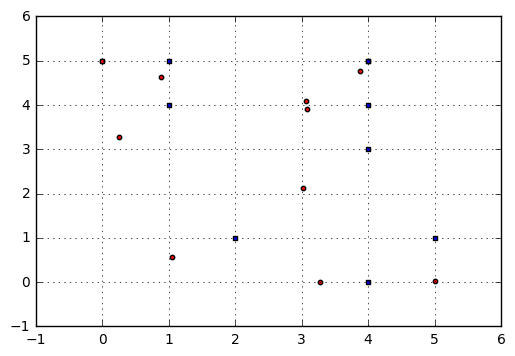

In [37]:
fig1 = plt.figure()
ax11 = fig1.add_subplot(111)

ax11.scatter(x_p,y_p, s = 10 ,c='b', marker="s", label='Recollected Data')
ax11.scatter(x_r,y_r, s = 10, c='r', marker="o", label='Original Data')
#plt.legend(loc='upper left');
plt.grid()
plt.show()


In [35]:
print(x_r.size)
print(x_p.size)

10
10


# Find Cumulative Density function in 2D

In [40]:
#This will create function distribution which will count the number of points at each grid square
distribution= [[0 for i in range(b+1)] for i in range(b+1)]

#for j in range (0,b+1):     
#    PXY[0][j] = 0
#    PXY[j][0] = 0
    
for j in range (0,b+1):
    for i in range (0, b+1): #For every upper right corner   
        #print("(" + str(i) + "," + str(j) + ") :") #print points  
        counter = 0
        for k in range (0, sizeOfVector): #For every point data given
            if (x_p[k]== i) and (y_p[k] == j): #If the point of the data matches the upper right hand corner
                #print("(" + str(x_p[k]) + "," + str(y_p[k]) + ")")
                counter = counter+1 #Then add 1 to the distribution counter
#        if(distribution != 0):
#            print("(" + str(i) + "," + str(j) + ") :") #print points  
#            print(distribution)        
        distribution[i][j] = counter
#PXY is now distribution
#distribution is now counter



In [50]:
print(distribution[4][5])

2


In [46]:
#Now we count the number of points on or below each square to create PXY
#This count includes those points that are on the boundary
lattice_count = np.asarray(distribution)    # Array of tile data counts
np.cumsum(lattice_count,axis=1, out=lattice_count)
np.cumsum(lattice_count, axis=0, out=lattice_count)
PXY = lattice_count/float(sizeOfVector)


In [51]:
print(lattice_count[3][4])

2


# Plotting the Cumulative Density Function

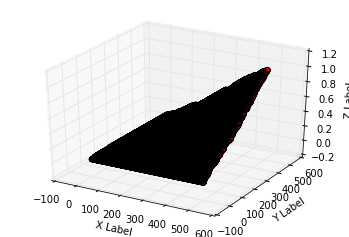

In [52]:
k =0

sizeOfMatrix = (b+1)*(b+1)

x_c=[0]*sizeOfMatrix
y_c=[0]*sizeOfMatrix
z_c=[0]*sizeOfMatrix

for i in range (0,b+1):   
    for j in range (0,b+1):
        
        x_c[k] = i
        y_c[k] = j
        z_c[k] = PXY[i][j]
        k = k+1
  
    
#print(x_c)
#print(y_c)
#print(z_c)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_c, y_c, z_c, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


# Calculate Cumulative Entropy in 2D

In [52]:
#Calculate CE(X,Y)
CEXY =0 

for i in range (1, b+1):
    for j in range (1 ,b+1):
        if (PXY[i][j] != 0):
            CEXY = CEXY - PXY[i][j]*np.log(PXY[i][j]) 

#print(CEXY)
            
CEXY= CEXY*(((max(x)-min(x))/b))*(((max(y)-min(y))/b))

print(CEXY)
    

0.19608432648


# Find Cumulative Density Distribution in 1D

In [54]:
P = [i/(b) for i in range(b)]
print(P)
#plt.plot(P)


[0.0, 0.2, 0.4, 0.6, 0.8]


In [55]:

#Calculate Cumulative Entropy of X and Y (Note CE(X) = CE(Y) by symmetry)
CEXoY = 0

for i in range (0,b):
    if(P[i] != 0):
        CEXoY = CEXoY - P[i]*np.log(P[i])

#print(CEXoY)


CEX = CEXoY*(((max(x)-min(x))/b))
CEY = CEXoY*(((max(y)-min(y))/b))

print(CEX)
print(CEY)


0.213705501973
0.204046438279


In [56]:
#CMI= CEXY - (max(y) - np.mean(y))*CEX - (max(x) - np.mean(x))*CEY 
CMI = CEXY - (max(y) - np.mean(y))*CEX - (max(x) - np.mean(x))*CEY 
print(CMI) #Compare to -0.0420891467695
CMI = CMI/np.max(x)*np.max(y)
print(CMI)

0.0171800319812
0.0133871339559


In [57]:
CMI = CMI/(np.max(x)*np.max(y))

In [58]:
CMI #Compare to -0.231744132816

0.073709970090297922

In [ ]:
# Need to do: Compute and Compare values of CEXY with the non-smooth version (They seem to coorelate)
#Do the same with CEX and CEY these don't seem to coorrelate